In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_csv("sales_data_sample.csv",encoding="latin")

In [13]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [15]:
df=df[["ORDERLINENUMBER","SALES"]]

In [16]:
scaler=StandardScaler()
scaled_values=scaler.fit_transform(df.values)

In [17]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init="k-means++")
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

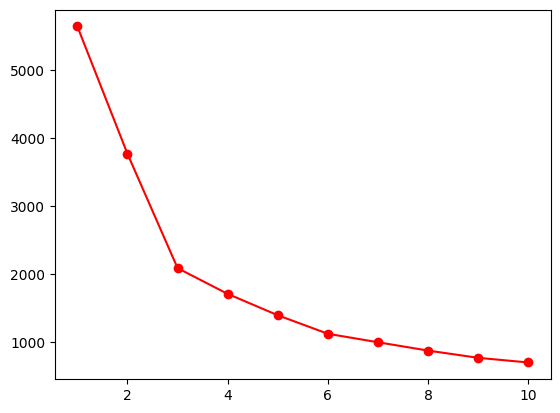

In [18]:
plt.plot(range(1,11),wcss,"ro-")
plt.show()

In [20]:
model=KMeans(n_clusters=7,init="k-means++")
clusters=model.fit_predict(scaled_values)
clusters

array([5, 5, 0, ..., 3, 5, 1], dtype=int32)

In [21]:
df["cluster"]=clusters

In [22]:
df

,ORDERLINENUMBER,SALES,cluster
0,2,2871.00,5
1,5,2765.90,5
2,2,3884.34,0
3,6,3746.70,0
4,14,5205.27,4
...,...,...,...
2818,15,2244.40,6
2819,1,3978.51,0
2820,4,5417.57,3
2821,1,2116.16,5


In [23]:
model.inertia_

997.8375603625008

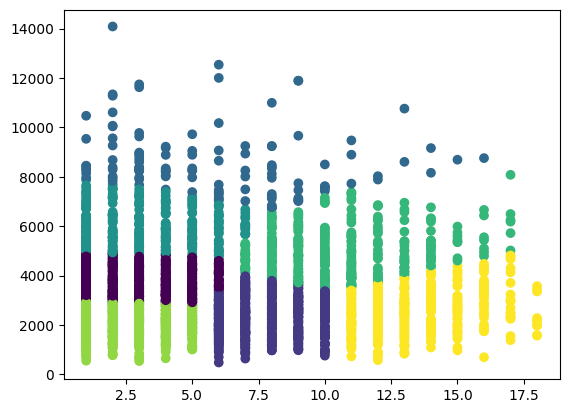

In [24]:
plt.scatter(df["ORDERLINENUMBER"],df["SALES"],c=df["cluster"])
plt.show()